In [1]:
import matplotlib.pyplot as plt
import seaborn
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Bin delta ignition for all patients between tumor and non-tumor regions

In [3]:
tumor_region_bin = []
non_tumor_region_bin = []

for k, s in tumor_subset.items():
    for i in range(68):
        if s.tumor_regions.is_tumor_region_by_id(i):
            tumor_region_bin.append(tumor_subjects_delta_ignitions[k][i])
        else:
            non_tumor_region_bin.append(tumor_subjects_delta_ignitions[k][i])

Let's plot this bins

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions (#126) vs. Non Tumor Regions (#1574): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.820e-05 U_stat=7.822e+04


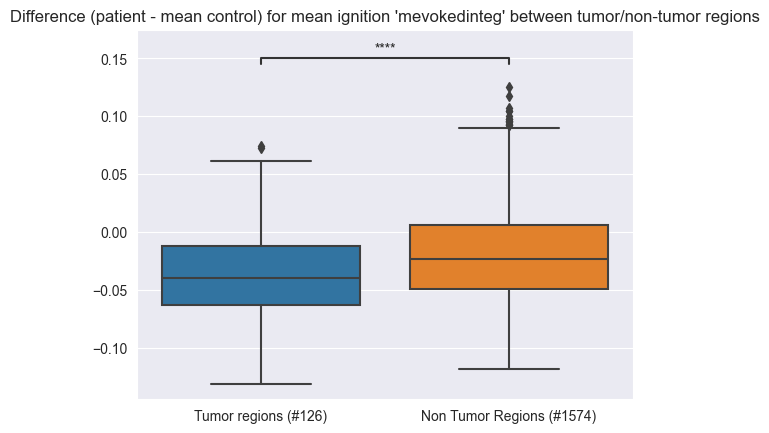

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions (#126) vs. Non Tumor Regions (#1574): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.769e-03 U_stat=8.526e+04


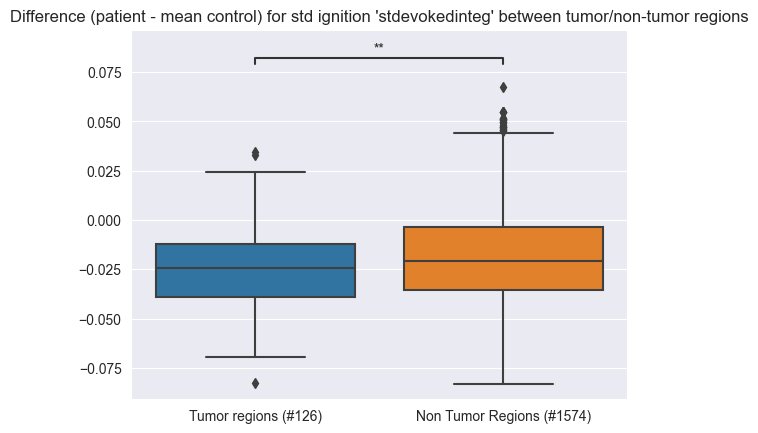

In [4]:
if True:
    tumor_regions = [r['mevokedinteg'] for r in tumor_region_bin]
    non_tumor_regions = [r['mevokedinteg'] for r in non_tumor_region_bin]

    plotComparisonAcrossLabels2(
        {
            'Tumor regions (#'+str(len(tumor_regions))+')': tumor_regions,
            'Non Tumor Regions (#'+str(len(non_tumor_regions))+')': non_tumor_regions,
        },
        graphLabel="Difference (patient - mean control) for mean ignition 'mevokedinteg' between tumor/non-tumor regions"
    )

if True:
    tumor_regions = [r['stdevokedinteg'] for r in tumor_region_bin]
    non_tumor_regions = [r['stdevokedinteg'] for r in non_tumor_region_bin]

    plotComparisonAcrossLabels2(
        {
            'Tumor regions (#'+str(len(tumor_regions))+')': tumor_regions,
            'Non Tumor Regions (#'+str(len(non_tumor_regions))+')': non_tumor_regions,
        },
        graphLabel="Difference (patient - mean control) for std ignition 'stdevokedinteg' between tumor/non-tumor regions"
    )

Let's visualize how delta 'mevokedinteg' is distributed between tumor/non-tumor regions from patients

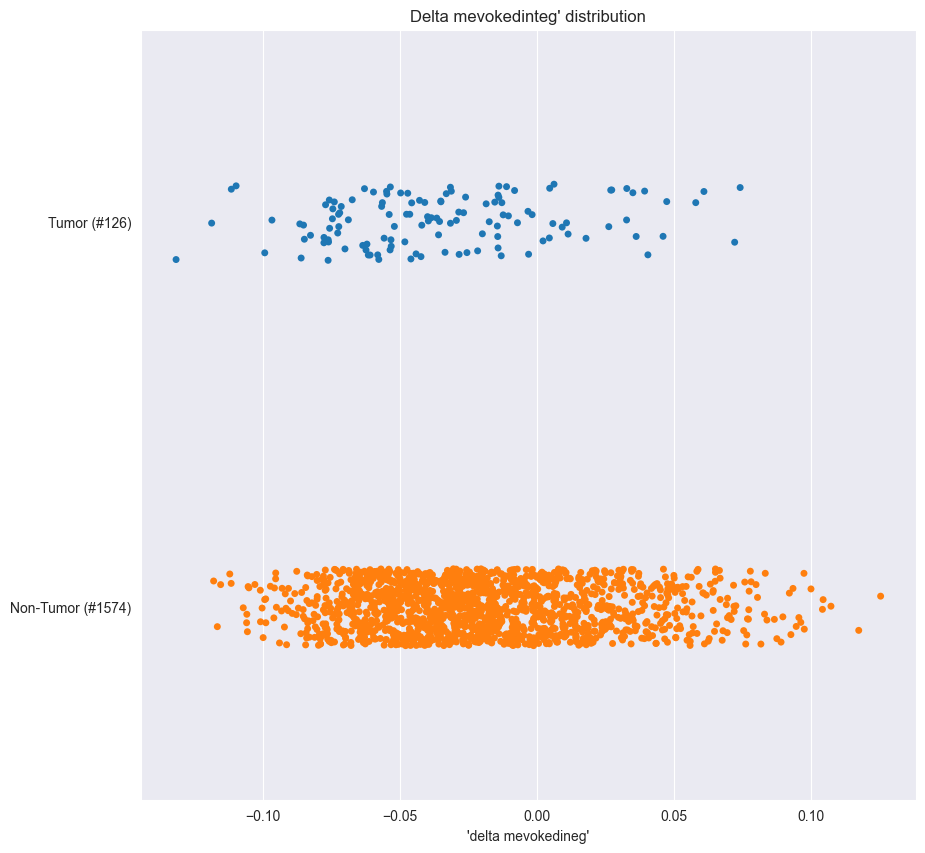

In [5]:
if True:
    tumor = [r['mevokedinteg'] for r in tumor_region_bin]
    non_tumor = [r['mevokedinteg'] for r in non_tumor_region_bin]

    plt.figure(figsize=(10, 10))
    seaborn.stripplot(
        data={
            'Tumor (#'+str(len(tumor))+')': tumor,
            'Non-Tumor (#'+str(len(non_tumor))+')': non_tumor
        },
        orient='h',
    )
    plt.xlabel("'delta mevokedineg'")
    plt.title("Delta mevokedinteg' distribution")
    plt.show()

Graph tumor regions:
- Delta Ignition vs Tumor Volume Percentage
- Abs(Delta Ignition) vs Tumor Volume Percentage

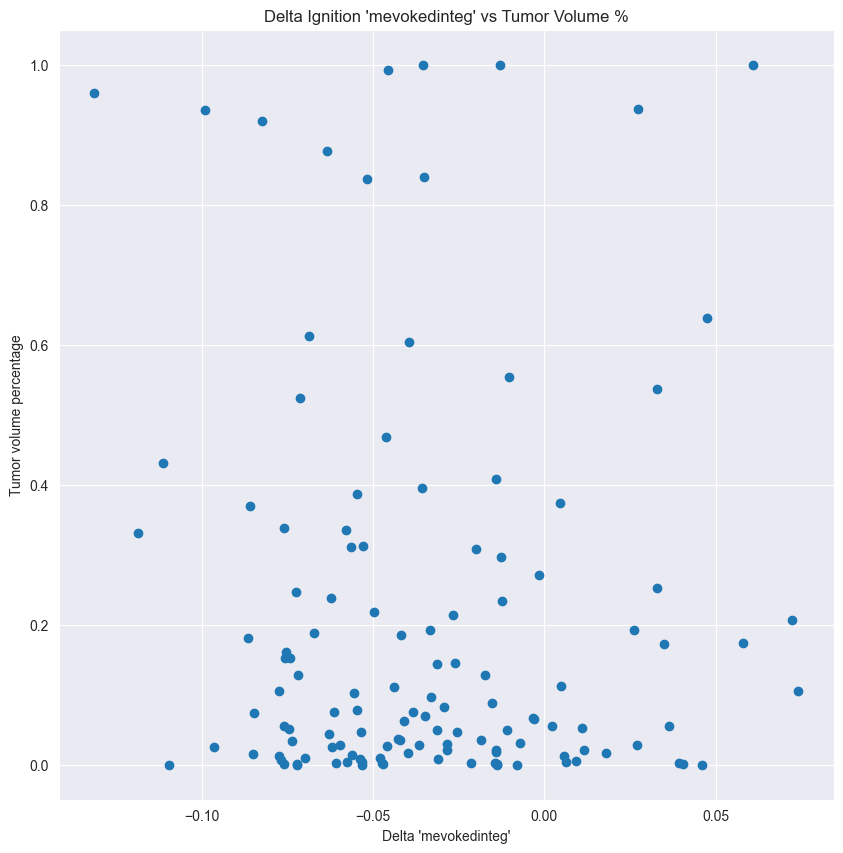

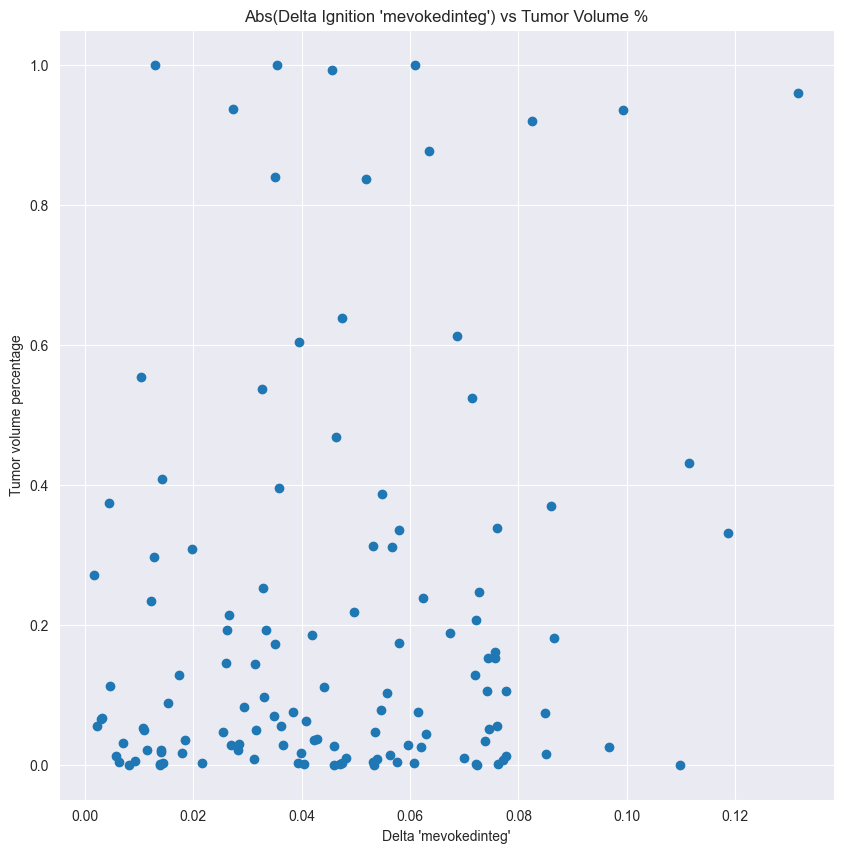

In [13]:
if True:
    x = []
    y = []
    for k, s in tumor_subset.items():
        for i in range(68):
            if s.tumor_regions.is_tumor_region_by_id(i):
                x.append(tumor_subjects_delta_ignitions[k][i]['mevokedinteg'])
                y.append(s.tumor_regions.get_tumor_volume_percentage_by_id(i))

    plt.figure(figsize=(10, 10))
    plt.plot(x, y, 'o')
    plt.xlabel("Delta 'mevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Delta Ignition 'mevokedinteg' vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.plot([abs(i) for i in x], y, 'o')
    plt.xlabel("Delta 'mevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Abs(Delta Ignition 'mevokedinteg') vs Tumor Volume %")
    plt.show()
